<a href="https://colab.research.google.com/github/vidhi-sys/Python-Learning/blob/main/pandas/diwali_sales_project_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv('/content/Diwali Sales Data.csv', encoding='latin1')
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
data.dropna(subset=['Amount'], inplace=True)
data['Amount']=data['Amount'].astype('int')

drop the null ones for data cleaning


In [8]:
data.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [9]:
data.tail(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
11241,1003032,Matthias,P00058042,F,26-35,33,0,Delhi,Central,Hospitality,Office,3,384
11242,1004344,Hildebrand,P00185442,F,26-35,27,1,Delhi,Central,Healthcare,Office,2,382
11243,1005446,Sheetal,P00297742,M,51-55,53,0,Gujarat,Western,Healthcare,Office,1,382
11244,1005446,Sheetal,P00297742,M,51-55,53,0,Madhya Pradesh,Central,Healthcare,Office,2,382
11245,1004140,Bertelson,P00057442,F,26-35,31,1,Delhi,Central,Aviation,Office,2,381
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188


In [10]:
data['Product_ID']=data['Product_ID'].str.split('P').str[1].astype('int')

In [11]:
data.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,57942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [12]:
data=data.drop(['Product_Category'], axis=1)

EDA USING CHARTS

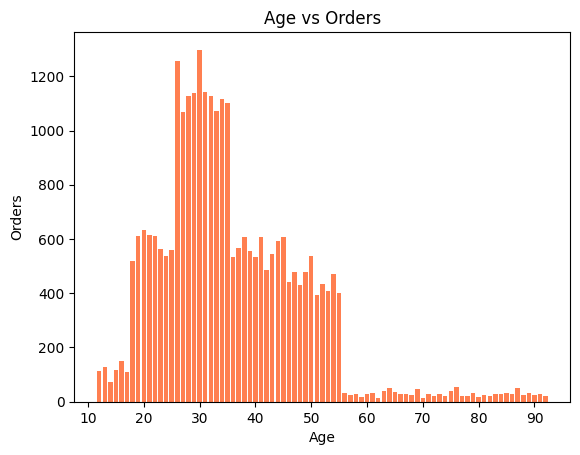

In [25]:
age_orders = data.groupby('Age')['Orders'].sum().reset_index()
plt.bar(age_orders['Age'], age_orders['Orders'], color='coral')
plt.title('Age vs Orders')
plt.xlabel('Age')
plt.ylabel('Orders')
plt.show()

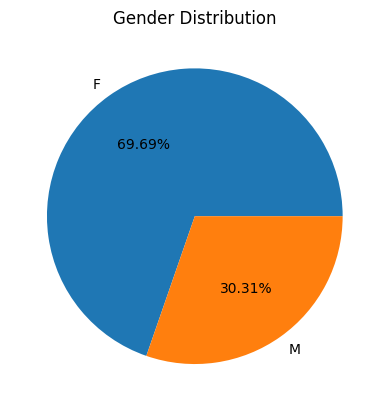

In [28]:
gender_counts = data['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.2f%%')
plt.title('Gender Distribution')
plt.show()

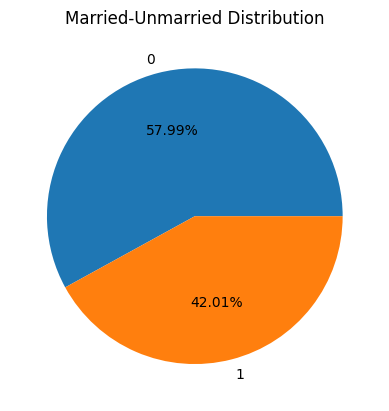

In [19]:
plt.pie(data['Marital_Status'].value_counts(), labels=data['Marital_Status'].value_counts().index, autopct='%1.2f%%')
plt.title('Married-Unmarried Distribution')
plt.show()

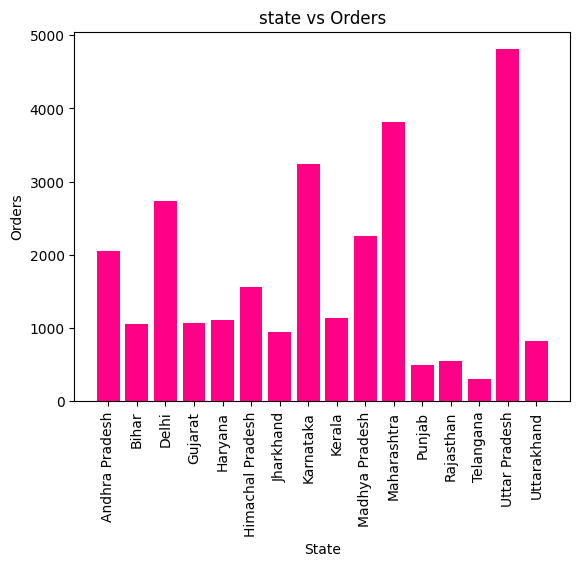

In [23]:
state_orders = data.groupby('State')['Orders'].sum().reset_index()
plt.bar(state_orders['State'], state_orders['Orders'], color='#FF0087')
plt.title('state vs Orders')
plt.xlabel('State')
plt.ylabel('Orders')
plt.xticks(rotation=90)
plt.show()

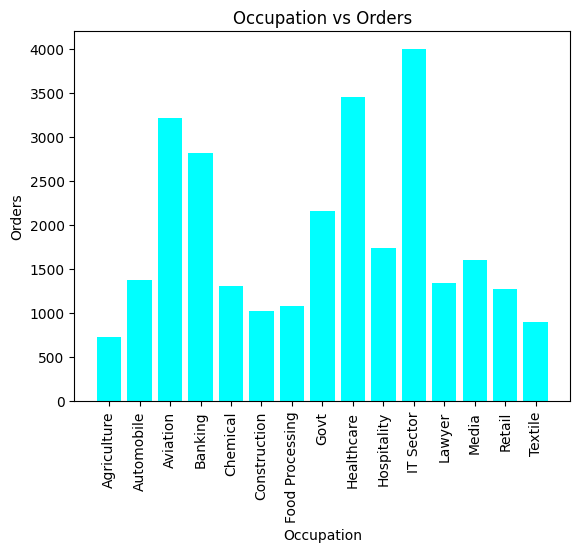

In [27]:
occupation_orders = data.groupby('Occupation')['Orders'].sum().reset_index()
plt.bar(occupation_orders['Occupation'], occupation_orders['Orders'], color='cyan')
plt.title('Occupation vs Orders')
plt.xlabel('Occupation')
plt.ylabel('Orders')
plt.xticks(rotation=90)
plt.show()

# **Observations:**
* Count of unmarried customers > married customers
* Count of female customers> male customers
* most orders are from age group 25-30
* Leading state is Uttar Pradesh
* Leading sector is IT-Sector

